In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [3]:
np.random.seed(42)
df = pd.read_csv("datos_accidentes_cerebrovasculares.csv")

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [6]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: >

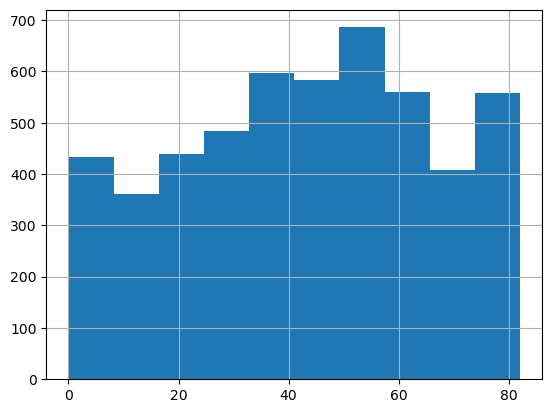

In [7]:
df.age.hist()

In [8]:
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [9]:
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [10]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


<Axes: >

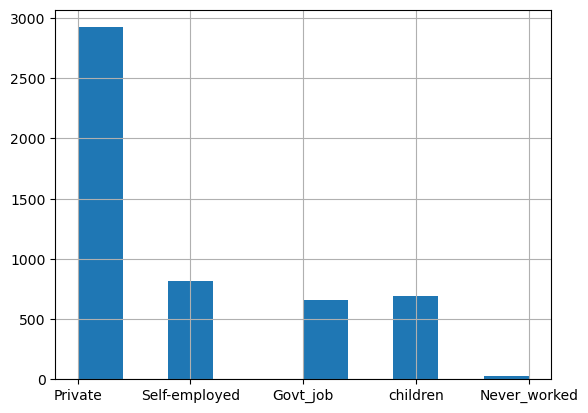

In [11]:
print(df.work_type.value_counts())
df.work_type.hist()

In [12]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [13]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: >

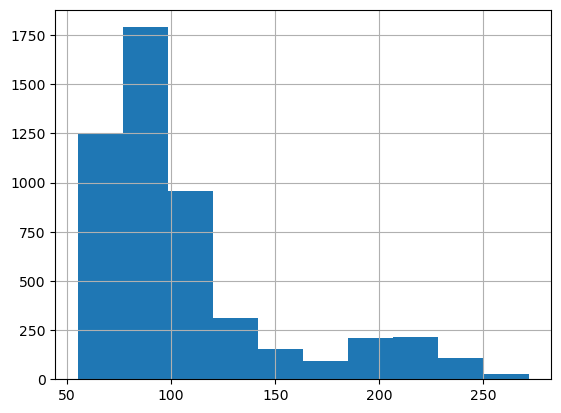

In [14]:
df.avg_glucose_level.hist()

In [15]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: >

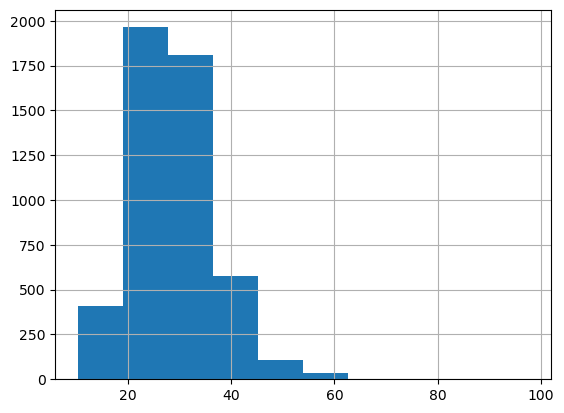

In [16]:
df.bmi.hist()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


<Axes: >

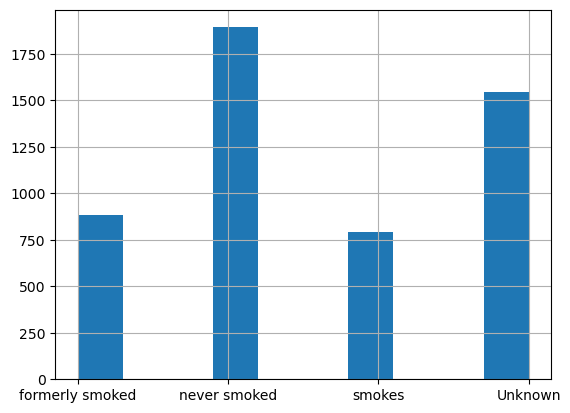

In [17]:
print(df.smoking_status.value_counts())
df.smoking_status.hist()

In [18]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [19]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df.gender = df.gender.astype('category')
df.age = df.age.astype('int64')
df.hypertension = df.hypertension.astype('bool')
df.heart_disease = df.heart_disease.astype('bool')
df.work_type = df.work_type.astype('category')
df.Residence_type = df.Residence_type.astype('category')
df.avg_glucose_level = df.avg_glucose_level.astype('float64')
df.bmi = df.bmi.astype('float64')
df.smoking_status = df.smoking_status.astype('category')
df.stroke = df.stroke.astype('bool')

Eliminamos el id, ya que es una columna que obviamente no aporta ningun valor

In [22]:
df.drop('id', axis=1, inplace=True)

Ya que Residence_type solo tiene 2 clases, se transformará la variable a un booleano

In [23]:
df.Residence_type.replace('Urban', 1, inplace=True)
df.Residence_type.replace('Rural', 0, inplace=True)
df.Residence_type = df.Residence_type.astype('bool')

Lo mismo con ever_married

In [24]:
df.ever_married.replace('Yes', 1, inplace=True)
df.ever_married.replace('No', 0, inplace=True)
df.ever_married = df.ever_married.astype('bool')
df.ever_married

0       True
1       True
2       True
3       True
4       True
        ... 
5105    True
5106    True
5107    True
5108    True
5109    True
Name: ever_married, Length: 5110, dtype: bool

In [25]:
df.ever_married.value_counts()

ever_married
True     3353
False    1757
Name: count, dtype: int64

In [26]:
df.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [27]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['stroke']
)

In [29]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [30]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df['bmi'].values.reshape(-1,1))
df_train.bmi = imputer.transform(df_train['bmi'].values.reshape(-1,1))
df_test.bmi = imputer.transform(df_test['bmi'].values.reshape(-1,1))

In [31]:
df_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

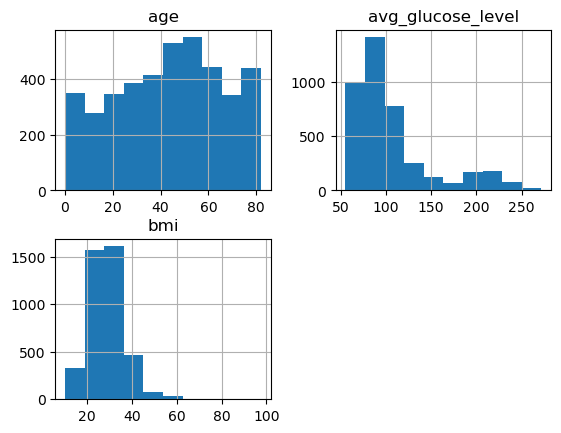

In [32]:
df_train.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

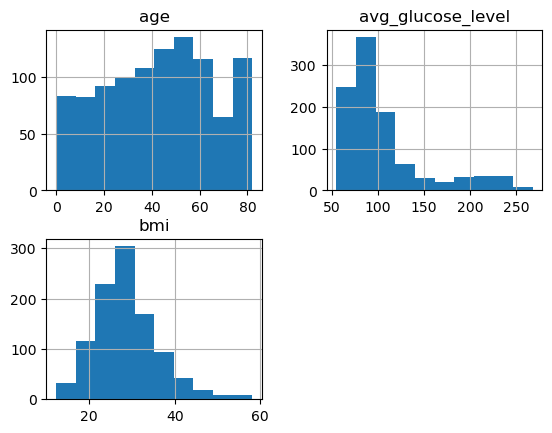

In [33]:
df_test.hist()

In [34]:
df_train.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [35]:
categoricas = df.select_dtypes(include='category').columns

onehotencoded_train = []
onehotencoded_test = []
for i in categoricas:
    encoder = OneHotEncoder()
    col_encoded_train = encoder.fit_transform(df_train[i].values.reshape(-1,1)).toarray()
    col_encoded_test = encoder.transform(df_test[i].values.reshape(-1,1)).toarray()
    col_df_train = pd.DataFrame(col_encoded_train, columns=encoder.categories_[0])
    col_df_test = pd.DataFrame(col_encoded_test, columns=encoder.categories_[0])
    col_df_train = col_df_train.astype('bool')
    col_df_test = col_df_test.astype('bool')
    onehotencoded_train.append(col_df_train)
    onehotencoded_test.append(col_df_test)
    
transformed_df_train = df_train.copy()
transformed_df_test = df_test.copy()
categories_train = pd.concat(onehotencoded_train, axis=1)
categories_test = pd.concat(onehotencoded_test, axis=1)
transformed_df_train = pd.concat([transformed_df_train, categories_train], axis=1)
transformed_df_test = pd.concat([transformed_df_test, categories_test], axis=1)
transformed_df_train.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)
transformed_df_test.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

In [36]:
numericas = df.select_dtypes(include=['int', 'float']).columns

scaled_train = []
scaled_test = []
for i in numericas:
    scaler = MinMaxScaler()
    col_scaled_train = scaler.fit_transform(df_train[i].values.reshape(-1,1))
    col_scaled_test = scaler.transform(df_test[i].values.reshape(-1,1))
    col_scaled_train_df = pd.DataFrame(col_scaled_train, columns=[i+'_scaled'])
    col_scaled_test_df = pd.DataFrame(col_scaled_test, columns=[i+'_scaled'])
    scaled_train.append(col_scaled_train_df)
    scaled_test.append(col_scaled_test_df)
scaled_numerical_train_df = pd.concat(scaled_train, axis=1)
scaled_numerical_test_df = pd.concat(scaled_test, axis=1)

In [37]:
final_train_df = pd.concat([transformed_df_train, scaled_numerical_train_df], axis = 1)
final_test_df = pd.concat([transformed_df_test, scaled_numerical_test_df], axis = 1)
final_train_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)
final_test_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)

<Axes: >

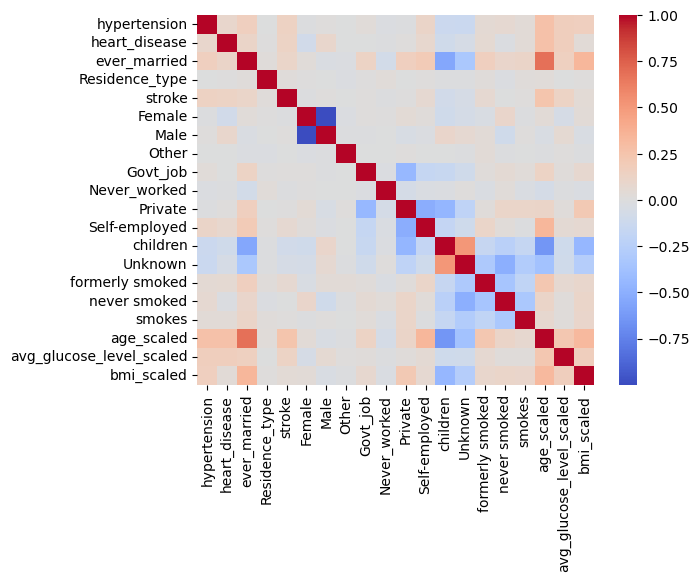

In [38]:
import seaborn as sns

sns.heatmap(final_train_df.corr(), cmap='coolwarm', fmt=".2f")

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [40]:
df_majority = final_train_df[final_train_df['stroke'] == 0]
df_minority = final_train_df[final_train_df['stroke'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

train_df_balanced = pd.concat([df_majority, df_minority_upsampled])
34
print(train_df_balanced['stroke'].value_counts())

stroke
False    3889
True     3889
Name: count, dtype: int64


<Axes: >

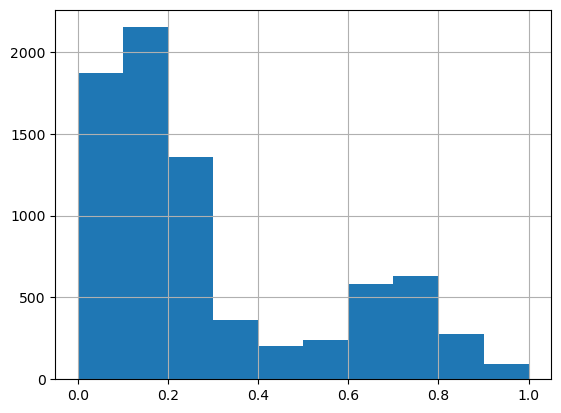

In [119]:
train_df_balanced.avg_glucose_level_scaled.hist()

In [163]:
final_df_train_Y = train_df_balanced.loc[:, 'stroke']
final_df_test_Y = final_test_df.loc[:, 'stroke']

In [164]:
final_df_train_X = train_df_balanced.drop('stroke', axis=1)
final_df_test_X = final_test_df.drop('stroke', axis=1)

In [165]:
final_df_test_Y.dtypes

dtype('bool')

In [166]:
hyperparameters_knn = {'n_neighbors': range(1, 100, 5)}

In [167]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters_knn,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


np.random.seed(42)

modelCV.fit(final_df_train_X.values, final_df_train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 5)},
             return_train_score=True, scoring='recall')

In [168]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,1.000000,0.000000,1
1,6,1.000000,0.000000,1
2,11,0.999229,0.001542,3
3,16,0.991515,0.004113,4
4,21,0.971717,0.013029,5
5,26,0.909228,0.010652,6
6,31,0.883774,0.014429,7
7,36,0.840321,0.006321,8
8,41,0.825666,0.020867,9
10,51,0.811521,0.015308,10


<ErrorbarContainer object of 3 artists>

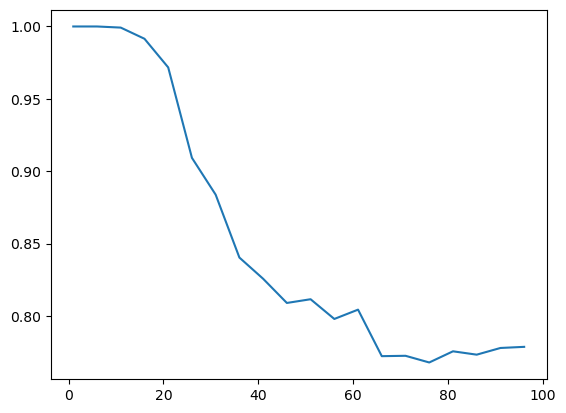

In [169]:
plt.errorbar(cv_results['param_n_neighbors'], cv_results['mean_test_score'])

Debido al rápido crecimietno del overfitting, tomamos el valor de vecinos en el punto donde la curva empieza a crecer desproporcionadamente

In [201]:
best_model_knn= KNeighborsClassifier(n_neighbors=35)

In [202]:
best_model_knn.fit(final_df_train_X, final_df_train_Y)

KNeighborsClassifier(n_neighbors=35)

In [203]:
knn_predict=best_model_knn.predict(final_df_test_X.values)

/home/noel/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [204]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=knn_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[666 306]
 [ 14  36]]


# Random Forest

In [275]:
final_df_train_X

,hypertension,heart_disease,ever_married,Residence_type,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,avg_glucose_level_scaled,bmi_scaled
0,False,False,True,True,True,False,False,False,False,True,False,False,False,False,True,False,0.585366,0.065045,0.261168
1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,0.182927,0.309898,0.122566
2,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.817073,0.255286,0.167239
3,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,True,0.536585,0.047503,0.166094
4,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,0.170732,0.125658,0.243986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,0.719512,0.290416,0.288660
892,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,0.841463,0.127828,0.202749
2099,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,False,1.000000,0.707137,0.254296
953,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.951220,0.250900,0.234822


In [276]:
hyperparameters_rf = param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 5, 10],
        'max_features' : [3, 4, 5, 7]
    }

In [277]:
rf = RandomForestClassifier()
modelCV = GridSearchCV(rf,
                       hyperparameters_rf,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [3, 4, 5, 7],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='recall')

In [278]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_estimators', 'param_max_features', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,std_test_score,rank_test_score
35,150,7,10,1.000000,0.000000,1
31,100,5,10,1.000000,0.000000,1
34,100,7,10,1.000000,0.000000,1
33,50,7,10,1.000000,0.000000,1
32,150,5,10,1.000000,0.000000,1
29,150,4,10,0.998713,0.002574,6
27,50,4,10,0.998713,0.002574,6
30,50,5,10,0.998201,0.003599,8
28,100,4,10,0.996399,0.002977,9
26,150,3,10,0.996399,0.002977,9


In [279]:
best_model_rf= RandomForestClassifier(random_state=42, n_estimators=100, max_features=4, max_depth=3)
best_model_rf.fit(final_df_train_X, final_df_train_Y)

RandomForestClassifier(max_depth=3, max_features=4, random_state=42)

In [280]:
rf_predict=best_model_rf.predict(final_df_test_X)

In [281]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rf_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[579 393]
 [ 10  40]]


# Regresion logistica

In [225]:
hyperparameters_rl = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [226]:
rl = LogisticRegression()
modelCV = GridSearchCV(rl,
                       hyperparameters_rl,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_X, final_df_train_Y)

/home/noel/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/noel/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall')

In [227]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
3,0.1,0.832095,0.008857,1
2,0.01,0.822322,0.011673,2
4,1,0.819755,0.016804,3
5,10,0.818469,0.016786,4
1,0.001,0.805349,0.011002,5
0,0.0001,0.789153,0.011653,6


<ErrorbarContainer object of 3 artists>

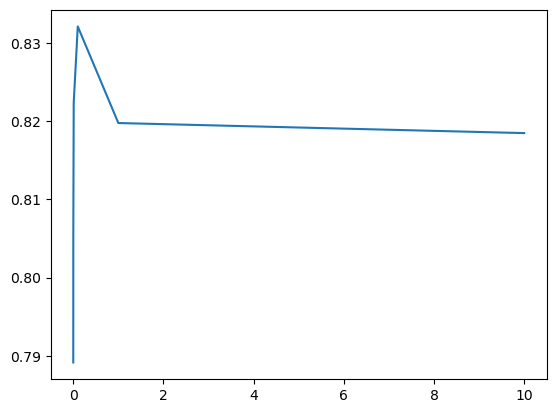

In [228]:
plt.errorbar(cv_results['param_C'], cv_results['mean_test_score'])

In [229]:
best_model_rl= modelCV.best_estimator_

In [230]:
rl_predict=best_model_rl.predict(final_df_test_X)

In [231]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rl_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[715 257]
 [ 10  40]]


# SVC

In [239]:
c = [10**i for i in range(-4, 5, 1)]
hyperparameters_svc = {
    
    'C': c
}

In [240]:
svc = SVC(random_state = 42)
modelCV = GridSearchCV(
    svc,
    hyperparameters_svc,
    cv=5,
    scoring='recall',#recall acuerdate memo
    return_train_score=True,
    n_jobs=-1
    )



modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             return_train_score=True, scoring='recall')

In [241]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
8,10000,0.987400,0.005538,1
7,1000,0.978657,0.006735,2
6,100,0.956801,0.006585,3
5,10,0.907946,0.009036,4
2,0.01,0.901002,0.008759,5
4,1,0.889949,0.006336,6
3,0.1,0.886347,0.007426,7
0,0.0001,0.744473,0.374089,8
1,0.001,0.744473,0.374089,8


<ErrorbarContainer object of 3 artists>

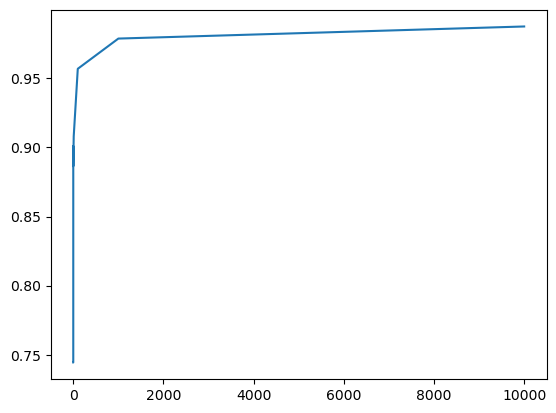

In [242]:
plt.errorbar(cv_results['param_C'], cv_results['mean_test_score'])


In [243]:
best_model_svc= SVC(random_state=42, C=100)
best_model_svc.fit(final_df_train_X, final_df_train_Y)

SVC(C=100, random_state=42)

In [245]:
svc_predict=best_model_svc.predict(final_df_test_X)

In [246]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=svc_predict)
print('La matriz de confusión del SVC es: \n{}'.format(matriz))

La matriz de confusión del SVC es: 
[[821 151]
 [ 29  21]]


In [282]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(final_df_test_Y, svc_predict)
recall = recall_score(final_df_test_Y, svc_predict)
f1 = f1_score(final_df_test_Y, svc_predict)
accuracy = accuracy_score(final_df_test_Y, svc_predict)
print('La precisión es del SVC: {}'.format(precision))
print('El recall es del SVC: {}'.format(recall))
print('El f1-score es del SVC: {}'.format(f1))
print('La accuracy es del SVC: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rf_predict)
recall = recall_score(final_df_test_Y, rf_predict)
f1 = f1_score(final_df_test_Y, rf_predict)
accuracy = accuracy_score(final_df_test_Y, rf_predict)
print('La precisión es del RF: {}'.format(precision))
print('El recall es del RF: {}'.format(recall))
print('El f1-score es del RF: {}'.format(f1))
print('La accuracy es del RF: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, knn_predict)
recall = recall_score(final_df_test_Y, knn_predict)
f1 = f1_score(final_df_test_Y, knn_predict)
accuracy = accuracy_score(final_df_test_Y, knn_predict)
print('La precisión es del KNN: {}'.format(precision))
print('El recall es del KNN: {}'.format(recall))
print('El f1-score es del :KNN {}'.format(f1))
print('La accuracy es del KNN: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rl_predict)
recall = recall_score(final_df_test_Y, rl_predict)
f1 = f1_score(final_df_test_Y, rl_predict)
accuracy = accuracy_score(final_df_test_Y, rl_predict)
print('La precisión es del RL: {}'.format(precision))
print('El recall es del RL: {}'.format(recall))
print('El f1-score es del RL: {}'.format(f1))
print('La accuracy es del RL: {}'.format(accuracy))

La precisión es del SVC: 0.12209302325581395
El recall es del SVC: 0.42
El f1-score es del SVC: 0.1891891891891892
La accuracy es del SVC: 0.8238747553816047
La precisión es del RF: 0.09237875288683603
El recall es del RF: 0.8
El f1-score es del RF: 0.16563146997929604
La accuracy es del RF: 0.6056751467710372
La precisión es del KNN: 0.10526315789473684
El recall es del KNN: 0.72
El f1-score es del :KNN 0.18367346938775508
La accuracy es del KNN: 0.6868884540117417
La precisión es del RL: 0.13468013468013468
El recall es del RL: 0.8
El f1-score es del RL: 0.23054755043227665
La accuracy es del RL: 0.738747553816047


In [248]:
from sklearn.metrics import auc, roc_curve
fpr_svc, tpr_svc, thresholds = roc_curve(final_df_test_Y, svc_predict, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(final_df_test_Y, rf_predict, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(final_df_test_Y, knn_predict, pos_label=1)
fpr_rl, tpr_rl, thresholds = roc_curve(final_df_test_Y, rl_predict, pos_label=1)

In [284]:
print('El área bajo la curva es del SVC: {}'.format(auc(fpr_svc, tpr_svc)))
print('El área bajo la curva es del RF: {}'.format(auc(fpr_rf, tpr_rf)))
print('El área bajo la curva es del KNN: {}'.format(auc(fpr_knn, tpr_knn)))
print('El área bajo la curva es del DT: {}'.format(auc(fpr_rl, tpr_rl)))

El área bajo la curva es del SVC: 0.6323251028806585
El área bajo la curva es del RF: 0.5043415637860083
El área bajo la curva es del KNN: 0.7025925925925924
El área bajo la curva es del DT: 0.767798353909465


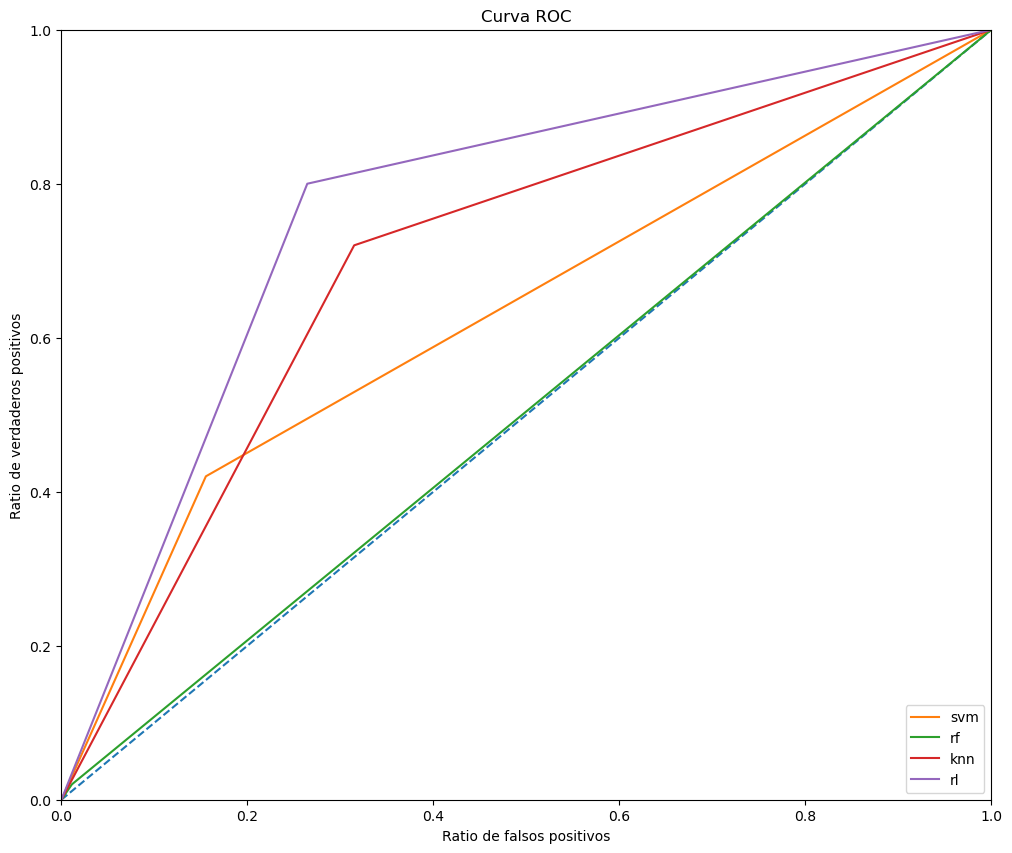

In [285]:
# Crear figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Pintar la diagonal
ax.plot([0,1],[0,1],ls='--')

# Pintar los ejes
ax.set_xlabel('Ratio de falsos positivos')
ax.set_ylabel('Ratio de verdaderos positivos')
ax.set_title('Curva ROC')

# Delimitar los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintar la curva
ax.plot(fpr_svc, tpr_svc, label='svm')
ax.plot(fpr_rf, tpr_rf, label='rf')
ax.plot(fpr_knn, tpr_knn, label='knn')
ax.plot(fpr_rl, tpr_rl, label='rl')

# Mostrar plot
ax.legend(loc='lower right')
plt.show()